In [1]:
#Setup#
import math 
import pandas as pd 
import pandas_datareader as web 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Pulls Data#
#Prints head#
df_dis = pd.read_csv('/Users/Brett/Desktop/Disney Clean.csv')
print(df_dis.head())


      Date  Close/Last    Volume   Open   High    Low
0  4/11/11       41.89   6883208  41.76  41.94  41.55
1  4/12/11       41.63   8362834  41.59  41.75  41.25
2  4/13/11       41.70   5951421  41.83  42.02  41.49
3  4/14/11       41.02  11196820  41.50  41.56  40.84
4  4/15/11       41.52   8367768  41.23  41.71  40.96


In [3]:
#Prints tail#
print(df_dis.tail())

        Date  Close/Last   Volume    Open    High     Low
2511  4/5/21      188.50  7405334  191.47  191.67  188.09
2512  4/6/21      189.73  7926185  188.50  191.28  187.87
2513  4/7/21      187.56  6238712  189.80  190.33  186.95
2514  4/8/21      187.32  7762950  187.20  188.05  185.63
2515  4/9/21      187.89  6089323  188.17  188.22  186.15


In [4]:
#Looks at shape of data#
df_dis.shape

(2516, 6)

In [5]:
#Renames columns#
df_dis.rename(columns={'Date': 'DATE'}, inplace=True)
df_dis.rename(columns={'Close/Last': 'CLOSE'}, inplace=True)
df_dis.rename(columns={'Volume': 'VOLUME'}, inplace=True)
df_dis.rename(columns={'Open': 'OPEN'}, inplace=True)
df_dis.rename(columns={'High': 'HIGH'}, inplace=True)
df_dis.rename(columns={'Low': 'LOW'}, inplace=True)

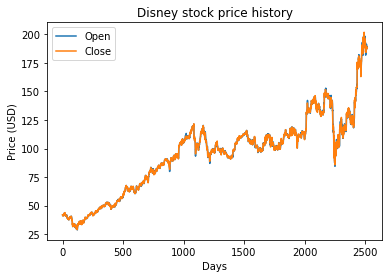

In [6]:
#Price Changes#
plt.figure()
plt.plot(df_dis["OPEN"])
plt.plot(df_dis["CLOSE"])
plt.title('Disney stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','Close'], loc='upper left')
plt.show()

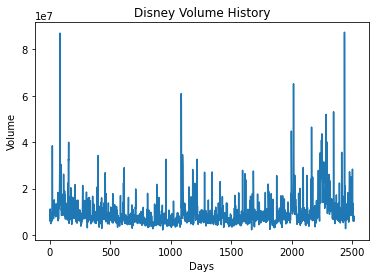

In [7]:
#Volume Changes#
plt.figure()
plt.plot(df_dis["VOLUME"])
plt.title('Disney Volume History')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [8]:
#Creating a new dataset filtering by closing price#
closedata=df_dis.filter(['CLOSE'])
newdata= closedata.values

#Training LSTM#
trainingdata=math.ceil(len(newdata) * .8)
trainingdata

2013

In [9]:
#Scaling data to make it easier to work with#
scaler = MinMaxScaler(feature_range=(0,1))
datascaled= scaler.fit_transform(newdata)
datascaled

array([[0.07454745],
       [0.07304378],
       [0.07344861],
       ...,
       [0.91700885],
       [0.91562084],
       [0.91891736]])

In [10]:
#Create training set#
train_data=datascaled[0:trainingdata, :]

#Splits data into x and y train#
x_train=[] 
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()


[array([0.07454745, 0.07304378, 0.07344861, 0.06951593, 0.07240761,
       0.07055694, 0.07142444, 0.07541496, 0.07674513, 0.07477879,
       0.07709213, 0.07853797, 0.08108264, 0.08154531, 0.08252848,
       0.08137181, 0.0787693 , 0.07917414, 0.08131398, 0.08154531,
       0.08622983, 0.07240761, 0.07275461, 0.07240761, 0.06899543,
       0.0694581 , 0.07182928, 0.07159794, 0.07229194, 0.0703256 ,
       0.06992077, 0.0701521 , 0.06934243, 0.07240761, 0.07304378,
       0.06593025, 0.06396391, 0.06003123, 0.0601469 , 0.05985773,
       0.05916373, 0.0599734 , 0.05494188, 0.05419004, 0.05546238,
       0.05430571, 0.05210803, 0.05228153, 0.05338037, 0.05656122,
       0.05384304, 0.0510092 , 0.04962119, 0.05245503, 0.05158753,
       0.05407437, 0.05806489, 0.06199757, 0.06344341, 0.06113007])]
[0.062113238100746065]



In [11]:
#Convert to arrays#
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#Prints shape of xtrain and ytrain#
print(x_train.shape)
print(y_train.shape)

(1953, 60)
(1953,)


In [13]:
#Reshapes data#
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train

array([[[0.07454745],
        [0.07304378],
        [0.07344861],
        ...,
        [0.06199757],
        [0.06344341],
        [0.06113007]],

       [[0.07304378],
        [0.07344861],
        [0.06951593],
        ...,
        [0.06344341],
        [0.06113007],
        [0.06211324]],

       [[0.07344861],
        [0.06951593],
        [0.07240761],
        ...,
        [0.06113007],
        [0.06211324],
        [0.06309641]],

       ...,

       [[0.48464519],
        [0.48377769],
        [0.48244752],
        ...,
        [0.48302585],
        [0.49592273],
        [0.49736857]],

       [[0.48377769],
        [0.48244752],
        [0.4786305 ],
        ...,
        [0.49592273],
        [0.49736857],
        [0.49713724]],

       [[0.48244752],
        [0.4786305 ],
        [0.47371465],
        ...,
        [0.49736857],
        [0.49713724],
        [0.50812561]]])

In [14]:
#LSTM model#
lstmmodel= Sequential()
lstmmodel.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
lstmmodel.add(LSTM(50, return_sequences=False))
lstmmodel.add(Dense(25))
lstmmodel.add(Dense(1))

In [15]:
#Model Continues MSE#
lstmmodel.compile(optimizer='adam', loss= 'mean_squared_error')

In [16]:
#Train the model#
#My computer also had difficulty running any epochs higher than 5, with it crashing#
#After researching lower epochs is what I found to work best for the most accurate stock predicting# 
lstmmodel.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1953/1953 [==============================] - 65s 32ms/step - loss: 0.0013
Epoch 2/5
1953/1953 [==============================] - 63s 32ms/step - loss: 2.8027e-04
Epoch 3/5
1953/1953 [==============================] - 61s 31ms/step - loss: 1.7400e-04
Epoch 4/5
1953/1953 [==============================] - 61s 31ms/step - loss: 1.4494e-04
Epoch 5/5
1953/1953 [==============================] - 61s 31ms/step - loss: 1.1572e-04


In [41]:
#Testing Dataset#
testdata=datascaled[trainingdata -60:, :]

x_test= []
y_test= newdata[trainingdata:,:]
for i in range(60, len(testdata)):
    x_test.append(testdata[i-60:i,0])

In [42]:
#Convert to numpy#
x_test=np.array(x_test)


In [43]:
#Checks Shape#
x_test.shape

(503, 60)

In [44]:
#Reshapes test#
x_test=np.reshape(x_test, (503, 60,1))

In [45]:
#Predicted Prices for Xtest#
pred= lstmmodel.predict(x_test)
pred= scaler.inverse_transform(pred)

In [46]:
#Evaluate model through RMSE#
rmse= np.sqrt(np.mean(pred - y_test)**2)
rmse

1.681949819030155

<ipython-input-47-5fc1a16666b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Predictions']= pred


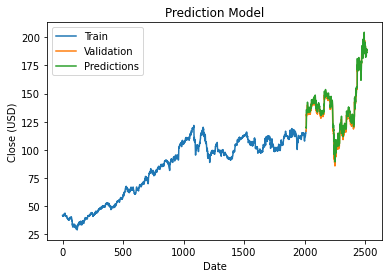

In [47]:
#Plotting Data#
train= closedata[:trainingdata]
val= closedata[trainingdata:]
val['Predictions']= pred
plt.figure()
plt.title('Prediction Model')
plt.xlabel('Date')
plt.ylabel('Close (USD)')
plt.plot(train['CLOSE'])
plt.plot(val[['CLOSE','Predictions']])
plt.legend(['Train', 'Validation','Predictions'])
plt.show()


In [48]:
#Shows off the valid and predicted prices#
#Shows actual close and predictions#
val

,CLOSE,Predictions
2013,116.60,119.892349
2014,130.06,119.245575
2015,132.04,132.893845
2016,129.90,135.688889
2017,131.75,132.626816
...,...,...
2511,188.50,189.385284
2512,189.73,187.827271
2513,187.56,189.247498
2514,187.32,186.075089


In [57]:
#Predicting future prices#
DisneyQuote= pd.read_csv('/Users/Brett/Desktop/Disney Clean.csv')
DisneyQuote.rename(columns={'Date': 'DATE'}, inplace=True)
DisneyQuote.rename(columns={'Close/Last': 'CLOSE'}, inplace=True)
DisneyQuote.rename(columns={'Volume': 'VOLUME'}, inplace=True)
DisneyQuote.rename(columns={'Open': 'OPEN'}, inplace=True)
DisneyQuote.rename(columns={'High': 'HIGH'}, inplace=True)
DisneyQuote.rename(columns={'Low': 'LOW'}, inplace=True)

In [58]:
#Filters for close#
DisneyQuote= DisneyQuote.filter(['CLOSE'])
#Gets the last 60 days of trading for Disney#
last60days=DisneyQuote[-60:].values
#Scales the values for 0 and 1#
last60daysscaled= scaler.transform(last60days)
#Empty list#
X_Test= []

#Appends the past 60 days#
X_Test.append(last60daysscaled)

#Convert to numpy#
X_Test= np.array(X_Test)
X_Test.shape

(1, 60, 1)

In [59]:
#Reshape for 3D#
X_Test= np.reshape(X_Test, (1,60,1))
#Gets predicted scale price#
predictedprice= lstmmodel.predict(X_Test)
#Gets rid of scaling#
#predictedprice=scaler.inverse_transform(predictedprice)#

#Prints next day predicted price#
print(predictedprice)

[[0.91449946]]


In [60]:
#Prints Predicted Price non inverse#

realpredictedprice=scaler.inverse_transform(predictedprice)

print(realpredictedprice)

[[187.1261]]


In [61]:
#Appends for next prediction#
Xtest2= X_Test[0,1:60,0]

In [62]:
Xtest2.shape

(59,)

In [63]:
Xtest2= np.append(Xtest2, predictedprice)

In [64]:
Xtest2.shape

(60,)

In [65]:
X_Test

array([[[0.85084726],
        [0.83529004],
        [0.82378116],
        [0.82852351],
        [0.83650454],
        [0.82285582],
        [0.83153085],
        [0.82638367],
        [0.81290845],
        [0.77514314],
        [0.82632583],
        [0.80486959],
        [0.82106298],
        [0.85570528],
        [0.8526401 ],
        [0.87461685],
        [0.87999537],
        [0.93112024],
        [0.92076803],
        [0.92898039],
        [0.93638309],
        [0.91764502],
        [0.91001099],
        [0.91053149],
        [0.89063675],
        [0.89439593],
        [0.94129894],
        [0.97212423],
        [0.97455324],
        [0.93678792],
        [0.92556821],
        [0.95992135],
        [0.95390666],
        [0.94419062],
        [0.91972703],
        [0.9310624 ],
        [1.        ],
        [0.95720317],
        [0.96038401],
        [0.97015789],
        [0.97252906],
        [0.97021572],
        [0.95564166],
        [0.96142502],
        [0.94430629],
        [0

In [66]:
Xtest2

array([0.83529004, 0.82378116, 0.82852351, 0.83650454, 0.82285582,
       0.83153085, 0.82638367, 0.81290845, 0.77514314, 0.82632583,
       0.80486959, 0.82106298, 0.85570528, 0.8526401 , 0.87461685,
       0.87999537, 0.93112024, 0.92076803, 0.92898039, 0.93638309,
       0.91764502, 0.91001099, 0.91053149, 0.89063675, 0.89439593,
       0.94129894, 0.97212423, 0.97455324, 0.93678792, 0.92556821,
       0.95992135, 0.95390666, 0.94419062, 0.91972703, 0.9310624 ,
       1.        , 0.95720317, 0.96038401, 0.97015789, 0.97252906,
       0.97021572, 0.95564166, 0.96142502, 0.94430629, 0.93771326,
       0.94766063, 0.92377537, 0.90058412, 0.91324967, 0.90752415,
       0.90133596, 0.90526864, 0.89942745, 0.92516338, 0.9224452 ,
       0.92955873, 0.91700885, 0.91562084, 0.91891736, 0.91449946])

In [67]:
#Reshape for 3D#
Xtest2= np.reshape(Xtest2, (1,60,1))
#Gets predicted scale price#
predictedprice2= lstmmodel.predict(Xtest2)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice2)

[[0.9085028]]


In [68]:
realpredictedprice2=scaler.inverse_transform(predictedprice2)
print(realpredictedprice2)

[[186.08923]]


In [69]:
#Appends for next prediction#
Xtest3= Xtest2[0,1:60,0]
Xtest3.shape
Xtest3= np.append(Xtest3, predictedprice2)
Xtest3.shape

(60,)

In [70]:
#Reshape for 3D#
Xtest3= np.reshape(Xtest3, (1,60,1))
#Gets predicted scale price#
predictedprice3= lstmmodel.predict(Xtest3)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice3)

[[0.9017225]]


In [71]:
realpredictedprice3=scaler.inverse_transform(predictedprice3)
print(realpredictedprice3)

[[184.91682]]


In [72]:
#Fourth prediction#
#Appends for next prediction#
Xtest4= Xtest3[0,1:60,0]
Xtest4.shape
Xtest4= np.append(Xtest4, predictedprice3)
#Reshape for 3D#
Xtest4= np.reshape(Xtest4, (1,60,1))
#Gets predicted scale price#
predictedprice4= lstmmodel.predict(Xtest4)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice4)

[[0.8946172]]


In [73]:
realpredictedprice4=scaler.inverse_transform(predictedprice4)
print(realpredictedprice4)

[[183.68826]]


In [74]:
#Fifth prediction#
#Appends for next prediction#
Xtest5= Xtest4[0,1:60,0]
Xtest5.shape
Xtest5= np.append(Xtest5, predictedprice4)
#Reshape for 3D#
Xtest5= np.reshape(Xtest5, (1,60,1))
#Gets predicted scale price#
predictedprice5= lstmmodel.predict(Xtest5)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice5)

[[0.88761264]]


In [75]:
realpredictedprice5=scaler.inverse_transform(predictedprice5)
print(realpredictedprice5)

[[182.4771]]


In [76]:
#Sixth prediction#
#Appends for next prediction#
Xtest6= Xtest5[0,1:60,0]
Xtest6.shape
Xtest6= np.append(Xtest6, predictedprice5)
#Reshape for 3D#
Xtest6= np.reshape(Xtest6, (1,60,1))
#Gets predicted scale price#
predictedprice6= lstmmodel.predict(Xtest6)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice6)

[[0.8809918]]


In [77]:
realpredictedprice6=scaler.inverse_transform(predictedprice6)
print(realpredictedprice6)

[[181.3323]]


In [78]:
#Seventh prediction#
#Appends for next prediction#
Xtest7= Xtest6[0,1:60,0]
Xtest7.shape
Xtest7= np.append(Xtest7, predictedprice6)
#Reshape for 3D#
Xtest7= np.reshape(Xtest7, (1,60,1))
#Gets predicted scale price#
predictedprice7= lstmmodel.predict(Xtest7)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice7)

[[0.8749171]]


In [79]:
realpredictedprice7=scaler.inverse_transform(predictedprice7)
print(realpredictedprice7)

[[180.2819]]


In [80]:
#Eight prediction#
#Appends for next prediction#
Xtest8= Xtest7[0,1:60,0]
Xtest8.shape
Xtest8= np.append(Xtest8, predictedprice7)
#Reshape for 3D#
Xtest8= np.reshape(Xtest8, (1,60,1))
#Gets predicted scale price#
predictedprice8= lstmmodel.predict(Xtest8)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice8)

[[0.8694724]]


In [81]:
realpredictedprice8=scaler.inverse_transform(predictedprice8)
print(realpredictedprice8)

[[179.34047]]


In [82]:
#Ninth prediction#
#Appends for next prediction#
Xtest9= Xtest8[0,1:60,0]
Xtest9.shape
Xtest9= np.append(Xtest9, predictedprice8)
#Reshape for 3D#
Xtest9= np.reshape(Xtest9, (1,60,1))
#Gets predicted scale price#
predictedprice9= lstmmodel.predict(Xtest9)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice9)

[[0.86469394]]


In [83]:
realpredictedprice9=scaler.inverse_transform(predictedprice9)
print(realpredictedprice9)

[[178.51422]]


In [84]:
#Tenth prediction#
#Appends for next prediction#
Xtest10= Xtest9[0,1:60,0]
Xtest10.shape
Xtest10= np.append(Xtest10, predictedprice9)
#Reshape for 3D#
Xtest10= np.reshape(Xtest10, (1,60,1))
#Gets predicted scale price#
predictedprice10= lstmmodel.predict(Xtest10)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice10)

[[0.8605891]]


In [85]:
realpredictedprice10=scaler.inverse_transform(predictedprice10)
print(realpredictedprice10)

[[177.80446]]


In [86]:
#Elevnth prediction#
#Appends for next prediction#
Xtest11= Xtest10[0,1:60,0]
Xtest11.shape
Xtest11= np.append(Xtest11, predictedprice10)
#Reshape for 3D#
Xtest11= np.reshape(Xtest11, (1,60,1))
#Gets predicted scale price#
predictedprice11= lstmmodel.predict(Xtest11)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice11)

[[0.8571454]]


In [87]:
realpredictedprice11=scaler.inverse_transform(predictedprice11)
print(realpredictedprice11)

[[177.20901]]


In [88]:
#Twelfth prediction#
#Appends for next prediction#
Xtest12= Xtest11[0,1:60,0]
Xtest12.shape
Xtest12= np.append(Xtest12, predictedprice11)
#Reshape for 3D#
Xtest12= np.reshape(Xtest12, (1,60,1))
#Gets predicted scale price#
predictedprice12= lstmmodel.predict(Xtest12)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice12)

[[0.8543352]]


In [89]:
realpredictedprice12=scaler.inverse_transform(predictedprice12)
print(realpredictedprice12)

[[176.7231]]


In [90]:
#Thirteenth prediction#
#Appends for next prediction#
Xtest13= Xtest12[0,1:60,0]
Xtest13.shape
Xtest13= np.append(Xtest13, predictedprice12)
#Reshape for 3D#
Xtest13= np.reshape(Xtest13, (1,60,1))
#Gets predicted scale price#
predictedprice13= lstmmodel.predict(Xtest13)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice13)

[[0.8521179]]


In [91]:
realpredictedprice13=scaler.inverse_transform(predictedprice13)
print(realpredictedprice13)

[[176.3397]]


In [92]:
#Fourteenth prediction#
#Appends for next prediction#
Xtest14= Xtest13[0,1:60,0]
Xtest14.shape
Xtest14= np.append(Xtest14, predictedprice13)
#Reshape for 3D#
Xtest14= np.reshape(Xtest14, (1,60,1))
#Gets predicted scale price#
predictedprice14= lstmmodel.predict(Xtest14)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice14)

[[0.85044193]]


In [93]:
realpredictedprice14=scaler.inverse_transform(predictedprice14)
print(realpredictedprice14)

[[176.04993]]


In [94]:
#Fifthteenth prediction#
#Appends for next prediction#
Xtest15= Xtest14[0,1:60,0]
Xtest15.shape
Xtest15= np.append(Xtest15, predictedprice14)
#Reshape for 3D#
Xtest15= np.reshape(Xtest15, (1,60,1))
#Gets predicted scale price#
predictedprice15= lstmmodel.predict(Xtest15)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice15)

[[0.84924686]]


In [95]:
realpredictedprice15=scaler.inverse_transform(predictedprice15)
print(realpredictedprice15)

[[175.84328]]


In [96]:
#Sixteenth prediction#
#Appends for next prediction#
Xtest16= Xtest15[0,1:60,0]
Xtest16.shape
Xtest16= np.append(Xtest16, predictedprice15)
#Reshape for 3D#
Xtest16= np.reshape(Xtest16, (1,60,1))
#Gets predicted scale price#
predictedprice16= lstmmodel.predict(Xtest16)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice16)

[[0.84846634]]


In [97]:
realpredictedprice16=scaler.inverse_transform(predictedprice16)
print(realpredictedprice16)

[[175.70831]]


In [98]:
#Seventeenth prediction#
#Appends for next prediction#
Xtest17= Xtest16[0,1:60,0]
Xtest17.shape
Xtest17= np.append(Xtest17, predictedprice16)
#Reshape for 3D#
Xtest17= np.reshape(Xtest17, (1,60,1))
#Gets predicted scale price#
predictedprice17= lstmmodel.predict(Xtest17)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice17)

[[0.84803087]]


In [99]:
realpredictedprice17=scaler.inverse_transform(predictedprice17)
print(realpredictedprice17)

[[175.63301]]


In [100]:
#Eighteenth prediction#
#Appends for next prediction#
Xtest18= Xtest17[0,1:60,0]
Xtest18.shape
Xtest18= np.append(Xtest18, predictedprice17)
#Reshape for 3D#
Xtest18= np.reshape(Xtest18, (1,60,1))
#Gets predicted scale price#
predictedprice18= lstmmodel.predict(Xtest18)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice18)

[[0.8478714]]


In [101]:
realpredictedprice18=scaler.inverse_transform(predictedprice18)
print(realpredictedprice18)

[[175.60545]]


In [102]:
#Nineteenth prediction#
#Appends for next prediction#
Xtest19= Xtest18[0,1:60,0]
Xtest19.shape
Xtest19= np.append(Xtest19, predictedprice18)
#Reshape for 3D#
Xtest19= np.reshape(Xtest19, (1,60,1))
#Gets predicted scale price#
predictedprice19= lstmmodel.predict(Xtest19)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice19)

[[0.8479218]]


In [103]:
realpredictedprice19=scaler.inverse_transform(predictedprice19)
print(realpredictedprice19)

[[175.61415]]


In [104]:
#Twentith prediction#
#Appends for next prediction#
Xtest20= Xtest19[0,1:60,0]
Xtest20.shape
Xtest20= np.append(Xtest20, predictedprice19)
#Reshape for 3D#
Xtest20= np.reshape(Xtest20, (1,60,1))
#Gets predicted scale price#
predictedprice20= lstmmodel.predict(Xtest20)
#Gets rid of scaling#
#predictedprice2=scaler.inverse_transform(predictedprice)
#Prints next day predicted price#
print(predictedprice20)

[[0.8481209]]


In [105]:
realpredictedprice20=scaler.inverse_transform(predictedprice20)
print(realpredictedprice20)

[[175.64859]]


In [106]:
Xtest20.shape

(1, 60, 1)